In [81]:
from collections import Counter
from imblearn.over_sampling import SMOTENC
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [82]:
rng = np.random.RandomState(42)
n_samples = 100
# Create a dataset of a mix of numerical and categorical data
X = np.empty((n_samples, 3), dtype=object)
X[:, 0] = rng.choice(["A", "B", "C"], size=n_samples).astype(np.str_)  # 离散特征
X[:, 1] = rng.randn(n_samples)  # 连续特征
X[:, 2] = rng.randn(n_samples)
y = np.array([0] * 10 + [1] * 10 + [2] * 80)

In [83]:
print("The original imbalanced dataset")
print(sorted(Counter(y).items()))
print()
print("The first columns are containing categorical features:")
print(X[:10])
print()

The original imbalanced dataset
[(0, 10), (1, 10), (2, 80)]

The first columns are containing categorical features:
[['C' 0.5821227947130392 -0.32449095782889326]
 ['A' 0.8877484595933572 -0.20586671709550497]
 ['C' 0.8943323301087615 -1.440041447683798]
 ['C' 0.7549977972447358 1.1907272561136402]
 ['A' -0.20716589010457426 1.2993968142644874]
 ['A' -0.62347739498496 -0.8671461560495533]
 ['C' -1.5081532895474827 0.617640845511145]
 ['B' 1.0996469757848204 1.2170707969801102]
 ['C' -0.17773212127065513 0.22628826949887482]
 ['C' -0.41038330868630046 0.8474014325766388]]



In [84]:
# When dealing with a mixed of continuous and categorical features, SMOTENC is the only method which can handle this case.
smote_nc = SMOTENC(k_neighbors=5,
                   # Specified which features are categorical.
                   categorical_features=[0],  # 指定第0个特征是分类特征
                   random_state=0)
X_resampled, y_resampled = smote_nc.fit_resample(X, y)
print("Dataset after resampling:")
print(sorted(Counter(y_resampled).items()))
print()
print("SMOTE-NC will generate categories for the categorical features:")
print(X_resampled[-5:])
print()

Dataset after resampling:
[(0, 80), (1, 80), (2, 80)]

SMOTE-NC will generate categories for the categorical features:
[['B' 0.9451509483101674 0.7695513869103205]
 ['B' 1.0247786451152667 0.5676628936748764]
 ['C' 1.4804373573803011 0.7292534363048597]
 ['C' 1.4186667588488848 0.8024406911829963]
 ['C' 0.9316409777329036 -0.83953536555218]]



In [85]:
le = LabelEncoder()
x0 = le.fit_transform(X[:, 0])
x0

array([2, 0, 2, 2, 0, 0, 2, 1, 2, 2, 2, 2, 0, 2, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 0, 2, 0, 2, 2, 0,
       0, 2, 1, 0, 1, 1, 1, 0, 1, 0, 1, 2, 2, 0, 2, 2, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 0, 1, 0, 0, 1, 2, 0,
       1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0])

In [86]:
x1 = le.transform(X_resampled[:, 0])
x1

array([2, 0, 2, 2, 0, 0, 2, 1, 2, 2, 2, 2, 0, 2, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 0, 2, 0, 2, 2, 0,
       0, 2, 1, 0, 1, 1, 1, 0, 1, 0, 1, 2, 2, 0, 2, 2, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 0, 1, 0, 0, 1, 2, 0,
       1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 2, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 0, 1, 1, 0, 0, 1, 0, 2,
       1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2])

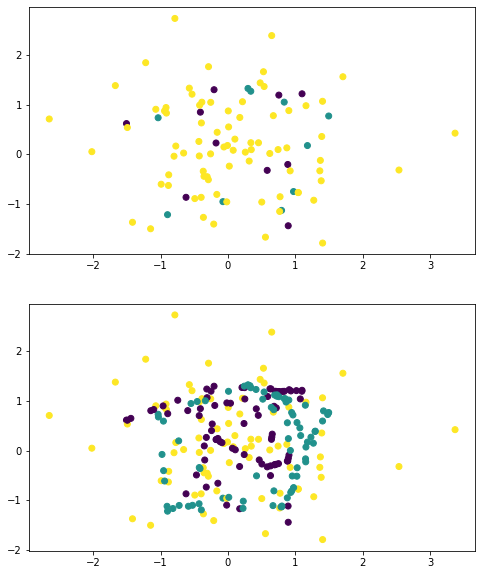

In [87]:
fig = plt.figure(figsize=(8, 10))
ax0 = plt.subplot(2, 1, 1)
ax1 = plt.subplot(2, 1, 2)

# 可以看出连续特征也是最近邻样本生成
ax0.scatter(X[:, 1], X[:, 2], c=y)
ax1.scatter(X_resampled[:, 1], X_resampled[:, 2], c=y_resampled)
plt.show()